## Задача 3.
(Дополнительно) Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Линейная зависимость: $ \bar y=b_1+b_0\cdot \bar x$  
Парная регрессия: $b_0=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$ и $b_1=\bar y-b_0\cdot\bar x$  
Функция потерь: $mse=\frac{1}{n}\sum^n_{i=1}(b_0*\bar x-{\bar y})^2$  
Производная функция потерь: $mse'=\frac{2}{n}\sum^n_{i=1}((b_1*\bar x-{\bar y})*\bar x)$  

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression

In [25]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [26]:
# Частная функция потерь
def mse_ab(a, b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

# Производная функция потерь по a
def mse_pa(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

# Производная функция потерь по b
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [36]:
alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000   
for i in range(iteration):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 10000 == 0:
        print(f'Итерация = {i}, a = {a}, b = {b}, mse = {mse_ab(a, b, zp, ks)}'.format(i = i, a = a, b = b))

Итерация = 0, a = 0.14197959999999998, b = 4.884978596113599, mse = 70366.2821016992
Итерация = 10000, a = 62.83828803932022, b = 5.427320315175873, mse = 43358.234980083085
Итерация = 20000, a = 116.67663832001111, b = 5.031052284674057, mse = 33677.68067521507
Итерация = 30000, a = 162.9139631763182, b = 4.690730310450177, mse = 26537.616149105896
Итерация = 40000, a = 202.6233933264173, b = 4.398455796170108, mse = 21271.33491856043
Итерация = 50000, a = 236.72655235964433, b = 4.147445287981601, mse = 17387.09579189967
Итерация = 60000, a = 266.0149468707068, b = 3.9318730360654524, mse = 14522.206331463507
Итерация = 70000, a = 291.1683366842369, b = 3.7467357837186466, mse = 12409.156296983896
Итерация = 80000, a = 312.77051152767103, b = 3.587736645833962, mse = 10850.638766071937
Итерация = 90000, a = 331.3228403161871, b = 3.4511853816901183, mse = 9701.126518597765
Итерация = 100000, a = 347.2559075176058, b = 3.3339127474648516, mse = 8853.283372220058
Итерация = 110000, a =

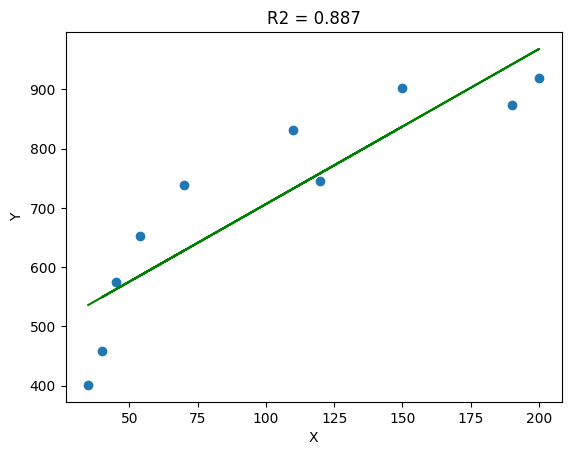

In [38]:
const = 444.1772
beta = 2.6205
r = np.corrcoef(zp, ks)
plt.scatter(zp, ks)
plt.plot(zp, const + beta * zp, c='g')
plt.title(f'R2 = {round(r[0][1], 3)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()